# SALES PREDICTION USING PYTHON
**Objective: **

The objective of this project is to predict future sales of a product by analyzing historical sales data, considering factors such as advertising expenditure, target audience segmentation, and platform selection. This will be achieved using machine learning algorithms in Python, allowing businesses to make informed decisions on their advertising strategies and optimize sales potential. Visualizations will be employed to better understand the relationships between different features and the predicted sales.

# Importing Libraries and Loading the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
url = "/content/car_purchasing.csv"
data = pd.read_csv(url,encoding='latin-1')

In [ ]:
data.head()


,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


# Data Preprocessing and Feature Selection

In [ ]:
data.isnull().sum()


,0
customer name,0
customer e-mail,0
country,0
gender,0
age,0
annual Salary,0
credit card debt,0
net worth,0
car purchase amount,0


In [ ]:
data = data.dropna()

In [ ]:
X = data[['annual Salary', 'credit card debt', 'net worth']]
y = data['car purchase amount']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the Machine Learning Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 42350161.96124286
R-squared: 0.6077713928939262


# Visualizing the Predictions vs Actual Sales

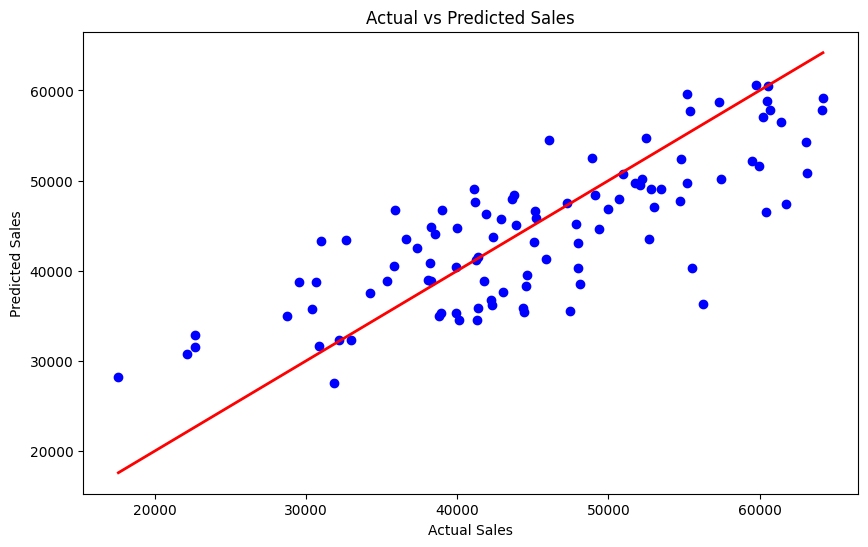

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


# Feature Importance Visualization

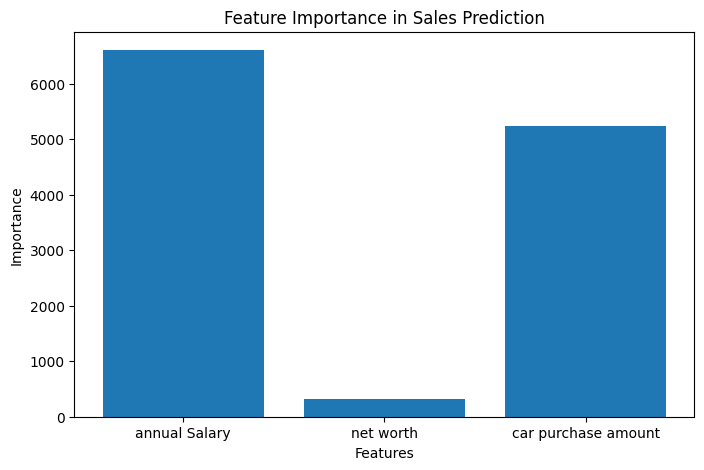

In [ ]:
coefficients = model.coef_
features = ['annual Salary', 'net worth','car purchase amount']
plt.figure(figsize=(8, 5))
plt.bar(features, coefficients)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Sales Prediction')
plt.show()


# Relationship Between Sales and Key Features

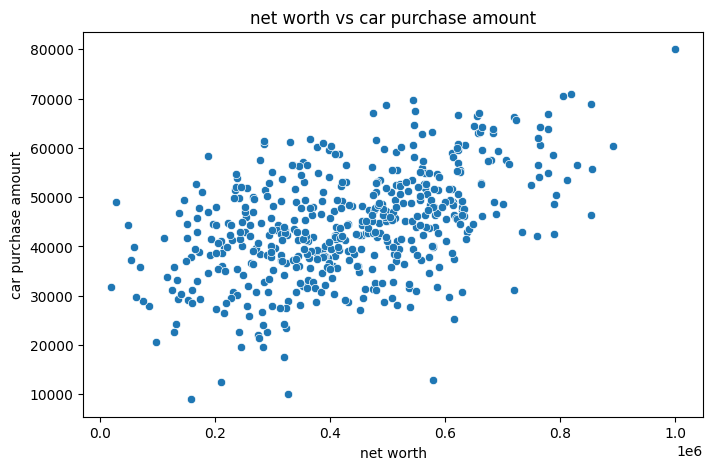

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='net worth', y='car purchase amount', data=data)
plt.title('net worth vs car purchase amount')
plt.xlabel('net worth')
plt.ylabel('car purchase amount')
plt.show()

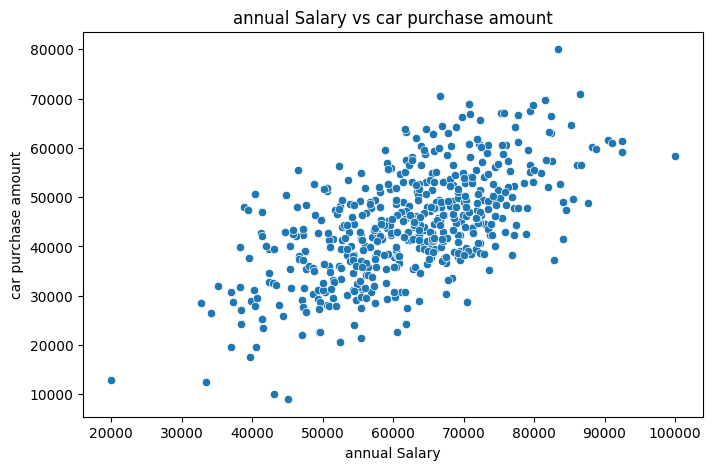

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='annual Salary', y='car purchase amount', data=data)
plt.title('annual Salary vs car purchase amount')
plt.xlabel('annual Salary')
plt.ylabel('car purchase amount')
plt.show()

# Feature Correlation Analysis

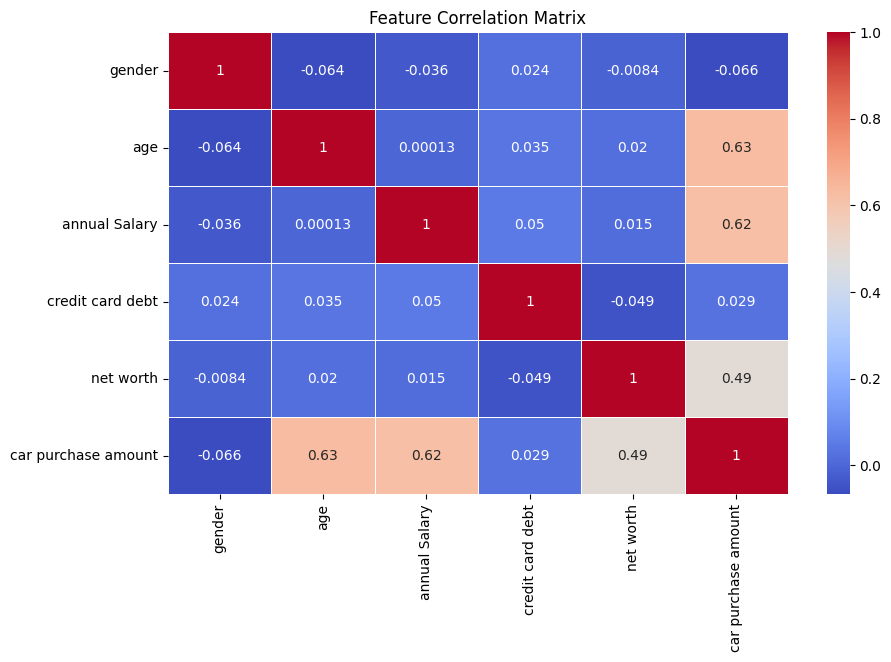

In [ ]:
plt.figure(figsize=(10, 6))
corr_matrix = data.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


# Residual Analysis (Check for Model Assumptions)

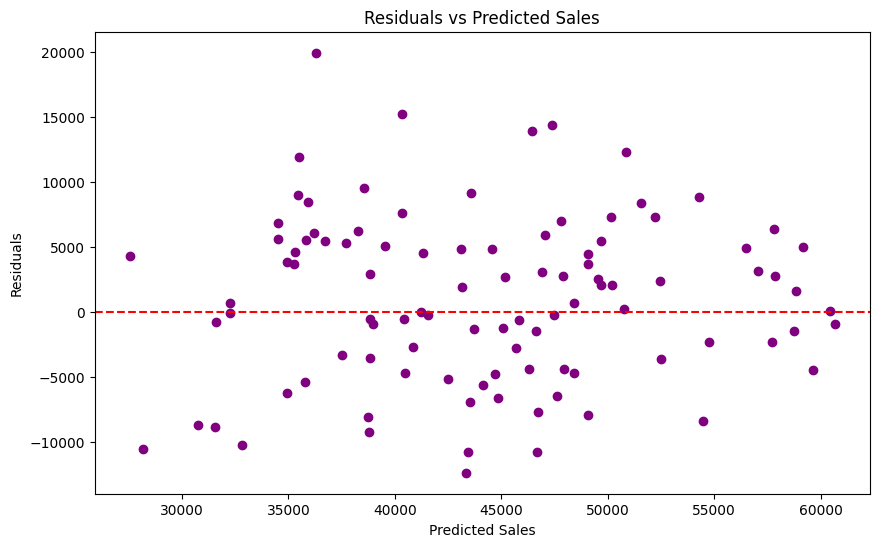

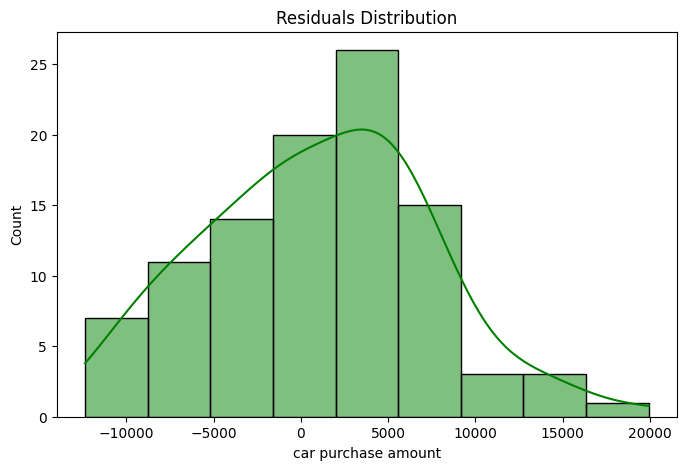

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sales')
plt.show()


plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='green')
plt.title('Residuals Distribution')
plt.show()


# Comparing Linear Regression with Other Models

In [ ]:
from sklearn.tree import DecisionTreeRegressor


tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

tree_y_pred = tree_model.predict(X_test)


tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_r2 = r2_score(y_test, tree_y_pred)

print(f"Decision Tree Mean Squared Error: {tree_mse}")
print(f"Decision Tree R-squared: {tree_r2}")


Decision Tree Mean Squared Error: 73498549.44289342
Decision Tree R-squared: 0.3192887031061322


# Random Forest Regression:

In [ ]:
from sklearn.ensemble import RandomForestRegressor


forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

forest_y_pred = forest_model.predict(X_test)

forest_mse = mean_squared_error(y_test, forest_y_pred)
forest_r2 = r2_score(y_test, forest_y_pred)

print(f"Random Forest Mean Squared Error: {forest_mse}")
print(f"Random Forest R-squared: {forest_r2}")


Random Forest Mean Squared Error: 50924737.29067447
Random Forest R-squared: 0.5283574406859768


# Cross-Validation for More Robust Evaluation

In [ ]:
from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print(f"Cross-validated R-squared scores: {cv_scores}")
print(f"Mean Cross-validated R-squared score: {cv_scores.mean()}")


Cross-validated R-squared scores: [0.67846238 0.56492146 0.50228067 0.6403032  0.60597566]
Mean Cross-validated R-squared score: 0.598388674546354


# Saving the Trained Model for Future Use

In [ ]:
import joblib


joblib.dump(model, '/content/car_purchasing.csv')




['/content/car_purchasing.csv']

# Hyperparameter Tuning (Grid Search)

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


grid_search = GridSearchCV(forest_model, param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)


print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R-squared Score: {grid_search.best_score_}")


Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best R-squared Score: 0.5300683876753343
